In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('netflix_titles.csv')
data

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

# Data Cleaning

In [7]:
missing_values_count = data.isnull().sum()
missing_values_percentage = (missing_values_count/len(data))*100
missing_values_percentage

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [10]:
data[['director','cast','country']] = data[['director','cast','country']].fillna("Unknown")
data.head(10)

show_id     type                             title  \
0      s1    Movie              Dick Johnson Is Dead   
1      s2  TV Show                     Blood & Water   
2      s3  TV Show                         Ganglands   
3      s4  TV Show             Jailbirds New Orleans   
4      s5  TV Show                      Kota Factory   
5      s6  TV Show                     Midnight Mass   
6      s7    Movie  My Little Pony: A New Generation   
7      s8    Movie                           Sankofa   
8      s9  TV Show     The Great British Baking Show   
9     s10    Movie                      The Starling   

                        director  \
0                Kirsten Johnson   
1                        Unknown   
2                Julien Leclercq   
3                        Unknown   
4                        Unknown   
5                  Mike Flanagan   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   
8                Andy Devonshire   
9                 Theodore Melfi   

                                                cast  \
0                                            Unknown   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                            Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
5  Kate Siegel, Zach Gilford, Hamish Linklater, H...   
6  Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9  Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   

                                             country          date_added  \
0                                      United States  September 25, 2021   
1                                       South Africa  September 24, 2021   
2                                            Unknown  September 24, 2021   
3                                            Unknown  September 24, 2021   
4                                              India  September 24, 2021   
5                                            Unknown  September 24, 2021   
6                                            Unknown  September 24, 2021   
7  United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
8                                     United Kingdom  September 24, 2021   
9                                      United States  September 24, 2021   

   release_year rating   duration  \
0          2020  PG-13     90 min   
1          2021  TV-MA  2 Seasons   
2          2021  TV-MA   1 Season   
3          2021  TV-MA   1 Season   
4          2021  TV-MA  2 Seasons   
5          2021  TV-MA   1 Season   
6          2021     PG     91 min   
7          1993  TV-MA    125 min   
8          2021  TV-14  9 Seasons   
9          2021  PG-13    104 min   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   
5                 TV Dramas, TV Horror, TV Mysteries   
6                           Children & Family Movies   
7   Dramas, Independent Movies, International Movies   
8                       British TV Shows, Reality TV   
9                                   Comedies, Dramas   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...  
5  The arrival of a charismatic young priest brin...  
6  Equestria's divided. But a bright-eyed hero be...  
7  On a photo shoot in Ghana, an American model s...  
8  A talented 

In [13]:
data.dropna(subset=['date_added','duration','date_added'], inplace = True)
data.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [15]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        0
listed_in       0
description     0
dtype: int64

In [16]:
data.drop_duplicates(inplace= True)

# Data Visualisation

In [18]:
top_countries_counts = data['country'].value_counts().head(10)
top_countries_data = top_countries_counts.reset_index(name='total')
top_countries_data

country  total
0   United States   2809
1           India    972
2         Unknown    830
3  United Kingdom    418
4           Japan    244
5     South Korea    199
6          Canada    181
7           Spain    145
8          France    124
9          Mexico    110

In [19]:
top_countries_data = top_countries_data[top_countries_data['country']!= 'Unknown']
top_countries_data

country  total
0   United States   2809
1           India    972
3  United Kingdom    418
4           Japan    244
5     South Korea    199
6          Canada    181
7           Spain    145
8          France    124
9          Mexico    110

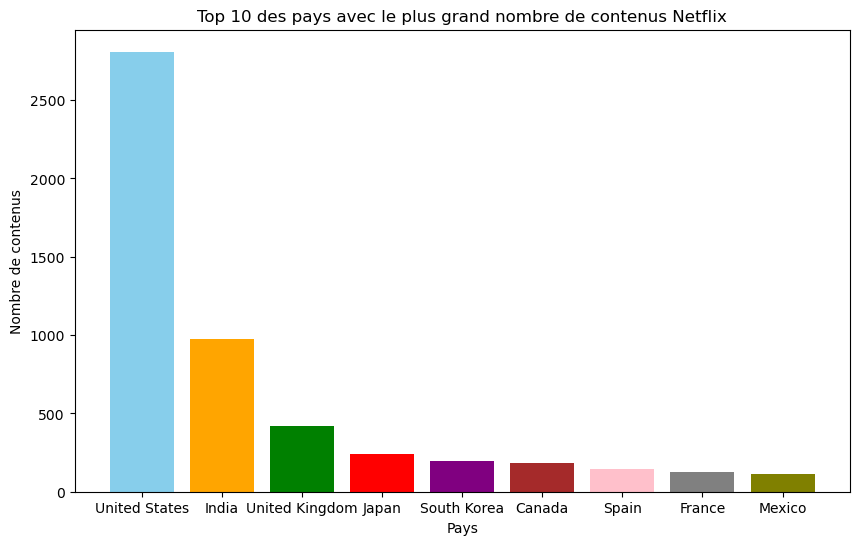

In [21]:
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
plt.figure(figsize=(10, 6))
plt.bar(top_countries_data['country'], top_countries_data['total'], color=colors)
plt.title('Top 10 des pays avec le plus grand nombre de contenus Netflix')
plt.xlabel('Pays')
plt.ylabel('Nombre de contenus')
plt.show()

In [23]:
genres = data['listed_in'].str.split(', ').explode().value_counts().head(10)

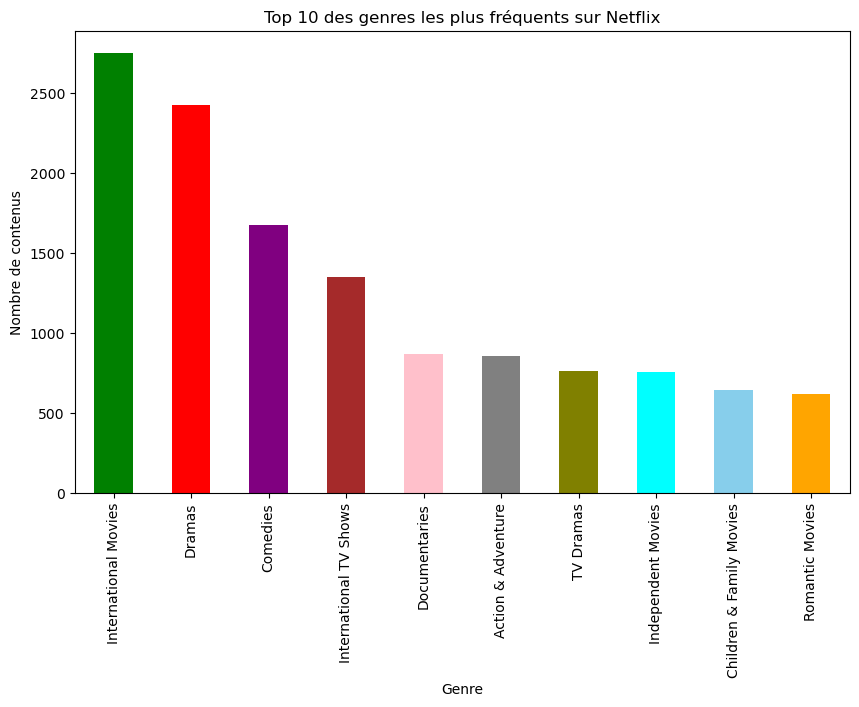

In [24]:
colors = ['green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'skyblue', 'orange']
plt.figure(figsize=(10, 6))
genres.plot(kind='bar', color=colors)
plt.title('Top 10 des genres les plus fréquents sur Netflix')
plt.xlabel('Genre')
plt.ylabel('Nombre de contenus')
plt.show()

# Recommendation based on country and genres (country=users)

In [30]:
def recommend_shows(data, country, genre, top_n=5):
    # Filter DataFrame based on country and genre
    filtered_data = data[
        (data['country'].str.contains(country, na=False, case=False)) &
        (data['listed_in'].str.contains(genre, na=False, case=False))
    ]
    # Group by show title and count occurrences
    genre_counts = filtered_df['title'].value_counts()
    # Get the top N recommended shows
    top_recommendations = genre_counts.head(top_n).index.tolist()
    return top_recommendations

In [32]:
country_input = 'United States'
genre_input = 'Dramas'
recommendations = recommend_shows(data, country_input, genre_input)
print(f"Top recommendations for {genre_input} shows in {country_input}:")
for idx, title in enumerate(recommendations, 1):
    print(f"{idx}. {title}")

Top recommendations for Dramas shows in United States:
1. Sankofa
2. Carol
3. Bleed for This
4. Blow
5. Blue Jasmine
